<a href="https://colab.research.google.com/github/LuisGuillermoRL/Challenges_IA-Center-ML/blob/main/Ejercicio_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Elección del dataset. Descripición:

El siguiente dataset se usó en una tarea que dejaron en el posgrado en el que estudio y en la cual me pidieron hacer un análisis de Componentes Principales (PCA) para los datos de los cangrejos de Ripley:

Data from Campbell & Mahon (1974) on the morphology of rock crabs of genus Leptograpsus.

There are 50 specimens of each sex of each of two colour forms.

Data file CRABS.DAT has rows:

- sp 'species', coded B (blue form) or O (orange form).
- sex coded M or F.
- index within each group of 50.
- FL frontal lip of carapace (mm).
- RW rear width of carapace (mm).
- CL length along the midline of carapace (mm).
- CW maximum width of carapace (mm).
- BD body depth (mm).

Estos datos estan organizados de acuerdo al color y sexo del animal, la idea es ver si se pueden encontrar clusters en base a las lecturas FL,RW,CL,CW y BD, cuando no se conoce el color porque se decoloró
con el tiempo.

In [ ]:
"""importamos librerías"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
""""Montamos el Drive para cargar los datos"""
from google.colab import drive
import os
drive.mount('/content/drive')

Mounted at /content/drive


###Visualizamos los datos

In [ ]:
ruta = "/content/drive/MyDrive/Bosch Prácticas 3era parte del curso/CRABS.DAT"

In [ ]:
crabs = pd.read_csv(ruta)

In [ ]:
crabs.columns

Index(['sp sex index FL RW CL CW BD'], dtype='object')

In [ ]:
crabs #Datos amontonados en una columna por 200 filas

,sp sex index FL RW CL CW BD
0,B M 1 8.1 6.7 16.1 19.0 7.0
1,B M 2 8.8 7.7 18.1 20.8 7.4
2,B M 3 9.2 7.8 19.0 22.4 7.7
3,B M 4 9.6 7.9 20.1 23.1 8.2
4,B M 5 9.8 8.0 20.3 23.0 8.2
...,...
195,O F 46 21.4 18.0 41.2 46.2 18.7
196,O F 47 21.7 17.1 41.7 47.2 19.6
197,O F 48 21.9 17.2 42.6 47.4 19.5
198,O F 49 22.5 17.2 43.0 48.7 19.8


In [ ]:
crabs_copy = crabs.copy()

In [ ]:
crabs_copy = crabs_copy['sp sex index FL RW CL CW BD'].str.split(expand=True) #Distinto a split(" ", expand=True)

In [ ]:
crabs_copy.columns = ['sp', 'sex', 'index', 'FL', 'RW', 'CL', 'CW', 'BD']
crabs_copy

,sp,sex,index,FL,RW,CL,CW,BD
0,B,M,1,8.1,6.7,16.1,19.0,7.0
1,B,M,2,8.8,7.7,18.1,20.8,7.4
2,B,M,3,9.2,7.8,19.0,22.4,7.7
3,B,M,4,9.6,7.9,20.1,23.1,8.2
4,B,M,5,9.8,8.0,20.3,23.0,8.2
...,...,...,...,...,...,...,...,...
195,O,F,46,21.4,18.0,41.2,46.2,18.7
196,O,F,47,21.7,17.1,41.7,47.2,19.6
197,O,F,48,21.9,17.2,42.6,47.4,19.5
198,O,F,49,22.5,17.2,43.0,48.7,19.8


Se observa que hay 50 B M, 50 B F, 50 O M y 50  O F. (Dataset bien balanceado)

# Exploración del dataset

In [ ]:
crabs_copy.sp.unique()

array(['B', 'O'], dtype=object)

In [ ]:
crabs_copy['index'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '50'], dtype=object)

In [ ]:
crabs_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sp      200 non-null    object
 1   sex     200 non-null    object
 2   index   200 non-null    object
 3   FL      200 non-null    object
 4   RW      200 non-null    object
 5   CL      200 non-null    object
 6   CW      200 non-null    object
 7   BD      200 non-null    object
dtypes: object(8)
memory usage: 12.6+ KB


In [ ]:
crabs_copy['index'] = crabs_copy['index'].astype(int)

In [ ]:
crabs_copy[['BD','CW', 'CL', 'RW', 'FL']] = crabs_copy[['BD','CW', 'CL', 'RW', 'FL']].astype(float)

In [ ]:
crabs_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sp      200 non-null    object 
 1   sex     200 non-null    object 
 2   index   200 non-null    int64  
 3   FL      200 non-null    float64
 4   RW      200 non-null    float64
 5   CL      200 non-null    float64
 6   CW      200 non-null    float64
 7   BD      200 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 12.6+ KB


In [ ]:
crabs_copy.describe()

,index,FL,RW,CL,CW,BD
count,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000
mean,25.500000,15.583000,12.73850,32.105500,36.414500,14.030500
std,14.467083,3.495325,2.57334,7.118983,7.871955,3.424772
min,1.000000,7.200000,6.50000,14.700000,17.100000,6.100000
25%,13.000000,12.900000,11.00000,27.275000,31.500000,11.400000
50%,25.500000,15.550000,12.80000,32.100000,36.800000,13.900000
75%,38.000000,18.050000,14.30000,37.225000,42.000000,16.600000
max,50.000000,23.100000,20.20000,47.600000,54.600000,21.600000


## Se puede observar todo lo siguiente:
- Nuestro target sp es binaria y categórica (Clasificación).
- Tenemos 7 características (features).
- Tenemos 200 instancias.
- La varibale o característica sex es una variable categórica nominal y binaria.
- El resto de características son numéricas o cuantitativas.
- Se puede observar también que es un dataset balanceado (100 B y 100 O, cada uno con 50 M y 50 F)

## Procedemos a realizar lo siguiente:

- Debido a que no es posible plotear todas las características para la elección de un algoritmo obtamos por reducir la dimensionalidad para tratar de obtener un mejor entendimiento de los datos así como una mejor toma de decisiones, por lo que procederemos a utilizar PCA.
- Para un primer análisis proponemos NO tomar en cuenta las características sex e index, esperando obtener buenos resultados.

# Primer Análisis


### PCA

Para obtener los eigenvalores (varianza de cada componente) se recomienda escalar cada una de las variables.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler #Escalamiento

In [ ]:
ss = StandardScaler()

In [ ]:
crabs_copy[['BD', 'CW', 'CL', 'RW', 'FL']] = ss.fit_transform(crabs_copy[['BD', 'CW', 'CL', 'RW', 'FL']])
crabs_copy

,sp,sex,index,FL,RW,CL,CW,BD
0,B,M,1,-2.146232,-2.352450,-2.253926,-2.217772,-2.057989
1,B,M,2,-1.945462,-1.962875,-1.972282,-1.988538,-1.940899
2,B,M,3,-1.830736,-1.923917,-1.845543,-1.784775,-1.853083
3,B,M,4,-1.716010,-1.884960,-1.690638,-1.695629,-1.706721
4,B,M,5,-1.658647,-1.846002,-1.662474,-1.708364,-1.706721
...,...,...,...,...,...,...,...,...
195,O,F,46,1.668399,2.049750,1.280706,1.246203,1.366870
196,O,F,47,1.754443,1.699132,1.351117,1.373555,1.630320
197,O,F,48,1.811806,1.738090,1.477856,1.399026,1.601048
198,O,F,49,1.983895,1.738090,1.534185,1.564583,1.688865


Text(0, 0.5, 'cumulative explained variance')

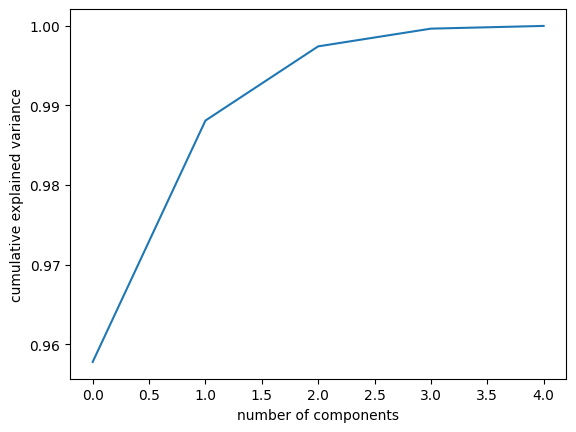

In [ ]:
#Ploteamos el número de componentes así como la varianza acumulada.
pca = PCA().fit(crabs_copy[['BD', 'CW', 'CL', 'RW', 'FL']])
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

Utilizaremos 3 componentes principales



In [ ]:
pca3 = PCA(n_components=3)
pca_3 = pca3.fit_transform(crabs_copy[['BD', 'CW', 'CL', 'RW', 'FL']])

In [ ]:
pca_3

array([[ 4.92757315e+00, -2.68445304e-01, -1.22257753e-01],
       [ 4.38617639e+00, -9.40735865e-02, -3.92318876e-02],
       [ 4.12866384e+00, -1.68875924e-01,  3.36436339e-02],
       [ 3.88368111e+00, -2.46008318e-01,  1.45010217e-02],
       [ 3.83405492e+00, -2.24166269e-01, -1.50673107e-02],
       [ 2.95295511e+00, -2.20020733e-01,  3.84281487e-02],
       [ 2.67844235e+00,  3.90230788e-02,  8.17102623e-02],
       [ 2.54843778e+00, -3.63383179e-01,  6.25916514e-02],
       [ 2.58517895e+00, -1.17037655e-01,  6.23383966e-02],
       [ 2.20585873e+00,  7.91663049e-02,  1.56973513e-01],
       [ 1.75857717e+00, -1.02981368e-02,  3.02371578e-01],
       [ 1.68388431e+00,  3.82340303e-02,  1.93104441e-01],
       [ 1.74282949e+00, -3.62089809e-01,  1.98638250e-01],
       [ 1.77573850e+00, -2.44730446e-01,  2.20492524e-01],
       [ 1.65026614e+00, -8.20012474e-03,  1.94577108e-01],
       [ 1.64056281e+00,  2.83574124e-02,  5.19016086e-02],
       [ 1.56438534e+00, -1.73623511e-01

Construimos un DataFrame con las 3 componentes principales y el target.

In [ ]:
comp_crabs = pd.DataFrame({ "PCA1": pca_3[:,0], "PCA2": pca_3[:,1],"PCA3": pca_3[:,2],"clase": crabs_copy['sp']})

In [ ]:
comp_crabs

,PCA1,PCA2,PCA3,clase
0,4.927573,-0.268445,-0.122258,B
1,4.386176,-0.094074,-0.039232,B
2,4.128664,-0.168876,0.033644,B
3,3.883681,-0.246008,0.014501,B
4,3.834055,-0.224166,-0.015067,B
...,...,...,...,...
195,-3.390864,0.681516,-0.256877,O
196,-3.487880,0.243256,-0.318587,O
197,-3.586209,0.239493,-0.279724,O
198,-3.803830,0.147597,-0.284499,O


In [ ]:
pca3.explained_variance_ratio_ #observamos cuanta varianza representa cada componente

array([0.95776696, 0.03033704, 0.00932659])

In [ ]:
eigenvalues = pca3.explained_variance_
eigenvalues #eigenvalues

array([4.81289928, 0.15244744, 0.04686731])

Graficamos la varianza que representada cada componente principal

<Axes: >

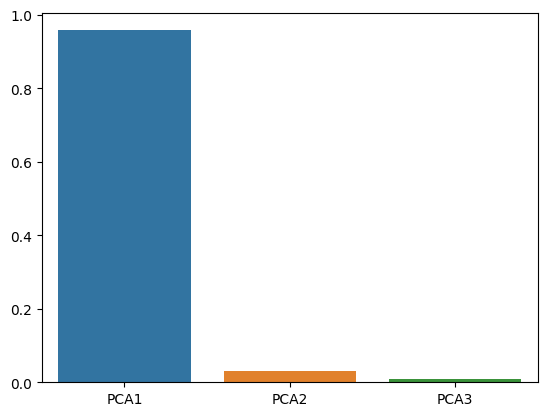

In [ ]:
sns.barplot(x=["PCA1","PCA2","PCA3"],
            y=pca3.explained_variance_ratio_)

## Análisis exploratorio (visualizacíon)

Graficamos las distintas combinaciones en 2D de estas componentes.

<Axes: xlabel='PCA1', ylabel='PCA2'>

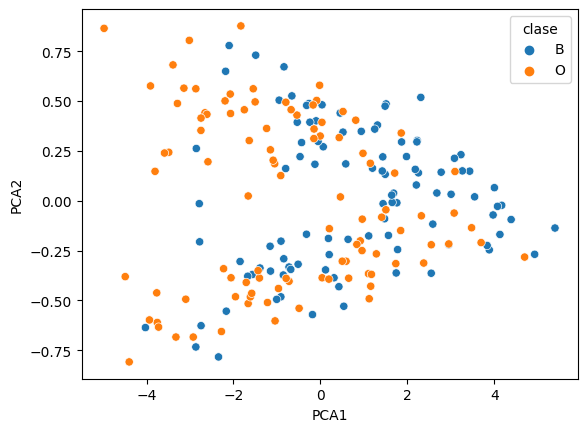

In [ ]:
sns.scatterplot(x="PCA1", y="PCA2",data=comp_crabs, hue="clase")

En esta gráfica podemos que no se aprecia una distinción clara entre estas dos componentes, parecen estar muy correlacionadas.

<Axes: xlabel='PCA1', ylabel='PCA3'>

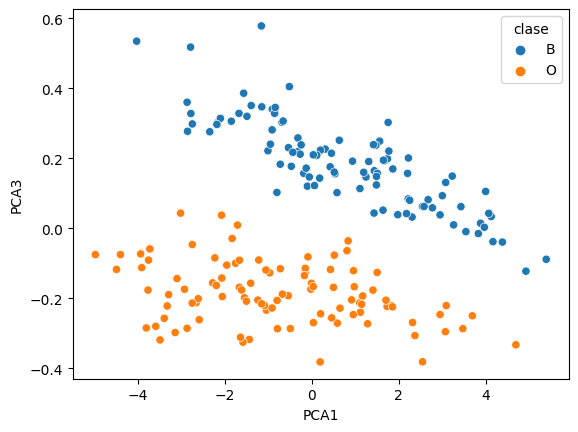

In [ ]:
sns.scatterplot(x="PCA1", y="PCA3",data=comp_crabs, hue="clase")#.iloc[:0,:1])

En este caso se puede apreciar una muy buena separación

<Axes: xlabel='PCA3', ylabel='PCA2'>

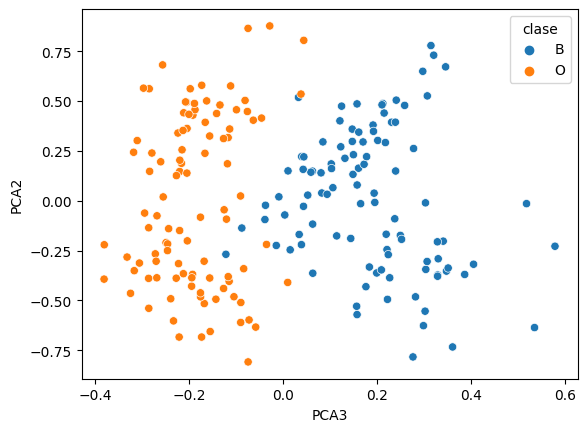

In [ ]:
sns.scatterplot(x="PCA3", y="PCA2",data=comp_crabs, hue="clase")# )#.iloc[:0,:1])

Podría uno pensar que es posible generar una separación entre ambos grupos, sin embargo, podrían mezclarse de tal forma que no sea posible separar del todo, Sería conveniente tomar más muestras.

# Elección del algoritmo

Podemos usar las componentes 1 y 3 para generar un modelo de aprendizaje. Debido a que son pocos datos y es notoria una separación casi lineal, podríamos usar como algoritmos de clasificación la máquina de soporte vectorial (SVC), un árbol de decición  (DTClassifier) y el algoritmo KNN.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(comp_crabs.drop(['clase', 'PCA2'], axis = 1), comp_crabs[['clase']].values.flatten().tolist(), test_size=.15, shuffle=True)

### Support Vector Machine (SVC)

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred_SVC = model.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred_SVC))

              precision    recall  f1-score   support

           B       1.00      1.00      1.00         7
           O       1.00      1.00      1.00        23

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



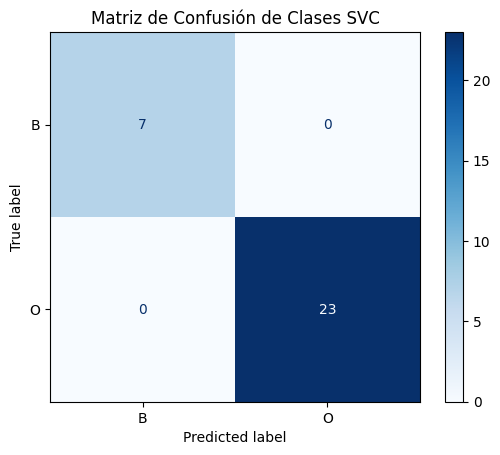

In [ ]:
disp = ConfusionMatrixDisplay.from_estimator(
        model,
        X_test,
        y_test,
        cmap=plt.cm.Blues
    )
disp.ax_.set_title('Matriz de Confusión de Clases SVC')
#print('title')
#print(disp.confusion_matrix)
plt.show()

Podemos observar que este algoritmo nos genera un 100% de clasificación, lo cual podría suponer overfitting o una muy clara separación en los datos (raramente posible en la práctica). Para tener una mejor comprensión del rendimietno del modelo y debido a que son pocos datos utilizaremos leave One Out validation (LOO) para este y los demás modelos.

In [ ]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

In [ ]:
loo = LeaveOneOut()

# Realizar validación cruzada LOO
resultados = cross_val_score(model, X_train, y_train, cv=loo)

# Imprimir los resultados de cada iteración
print("Resultados de cada iteración:", resultados)

# Calcular y mostrar el rendimiento promedio
print("Rendimiento promedio:", resultados.mean())

Resultados de cada iteración: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]
Rendimiento promedio: 1.0


### DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_DTC = tree.predict(X_test)
print(classification_report(y_test,y_pred_DTC))

              precision    recall  f1-score   support

           B       1.00      0.86      0.92         7
           O       0.96      1.00      0.98        23

    accuracy                           0.97        30
   macro avg       0.98      0.93      0.95        30
weighted avg       0.97      0.97      0.97        30



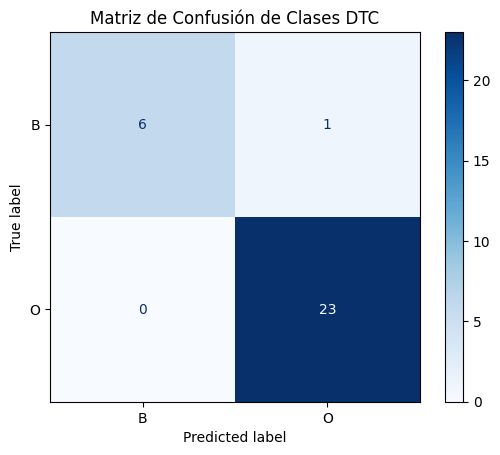

In [ ]:
disp = ConfusionMatrixDisplay.from_estimator(
        tree,
        X_test,
        y_test,
        cmap=plt.cm.Blues
    )
disp.ax_.set_title('Matriz de Confusión de Clases DTC')
#print('title')
#print(disp.confusion_matrix)
plt.show()

In [ ]:
# Realizar validación cruzada LOO
resultados_DTC = cross_val_score(tree, X_train, y_train, cv=loo)

# Imprimir los resultados de cada iteración
print("Resultados de cada iteración:", resultados_DTC)

# Calcular y mostrar el rendimiento promedio
print("Rendimiento promedio:", resultados_DTC.mean())

Resultados de cada iteración: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]
Rendimiento promedio: 0.9588235294117647


### K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 6)
KNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [ ]:
y_pred_KNN = KNN.predict(X_test)
print(classification_report(y_test,y_pred_KNN))

              precision    recall  f1-score   support

           B       0.70      1.00      0.82         7
           O       1.00      0.87      0.93        23

    accuracy                           0.90        30
   macro avg       0.85      0.93      0.88        30
weighted avg       0.93      0.90      0.91        30



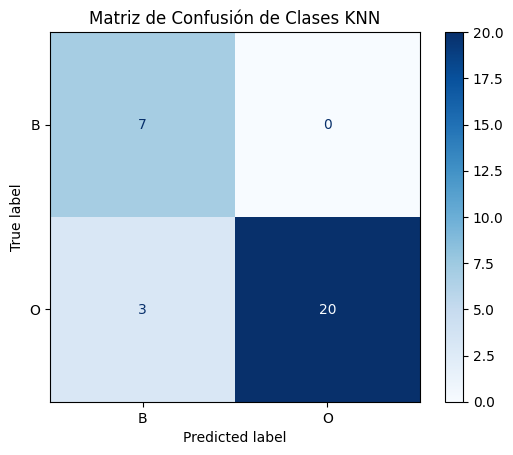

In [ ]:
disp = ConfusionMatrixDisplay.from_estimator(
        KNN,
        X_test,
        y_test,
        cmap=plt.cm.Blues
    )
disp.ax_.set_title('Matriz de Confusión de Clases KNN')
#print('title')
#print(disp.confusion_matrix)
plt.show()

Al igual que en el algoritmo anterior, este tuvo un error pero interesantemente la clasificación errónea fue distinta.

In [ ]:
# Realizar validación cruzada LOO
resultados_KNN = cross_val_score(KNN, X_train, y_train, cv=loo)

# Imprimir los resultados de cada iteración
print("Resultados de cada iteración:", resultados_KNN)

# Calcular y mostrar el rendimiento promedio
print("Rendimiento promedio:", resultados_KNN.mean())

Resultados de cada iteración: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0.
 0. 1.]
Rendimiento promedio: 0.9235294117647059


# Conclusión

Podemos observar con este primer análisis es suficiente para elegir o construir un buen algoritmo de clasificación. Podemos utilizar SVC como primer opción sin ningún problema, esto debido a las pocas características útiles y suficientes para obtener buenos resultados.